<a href="https://colab.research.google.com/github/arunkusuma74/KDD_project/blob/main/deliverable_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1

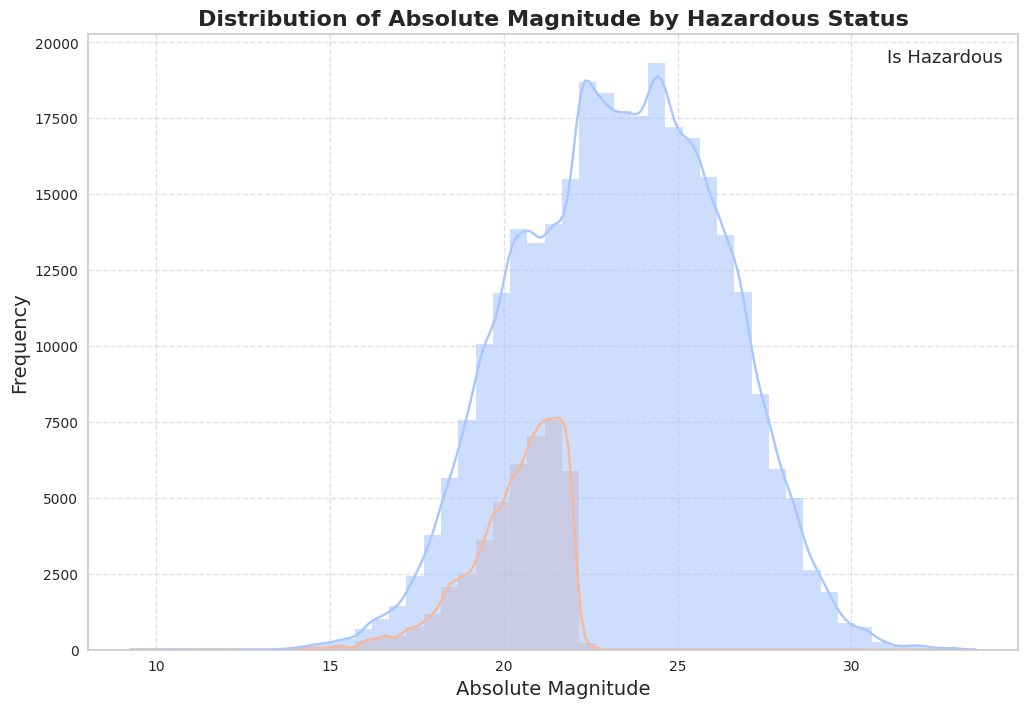

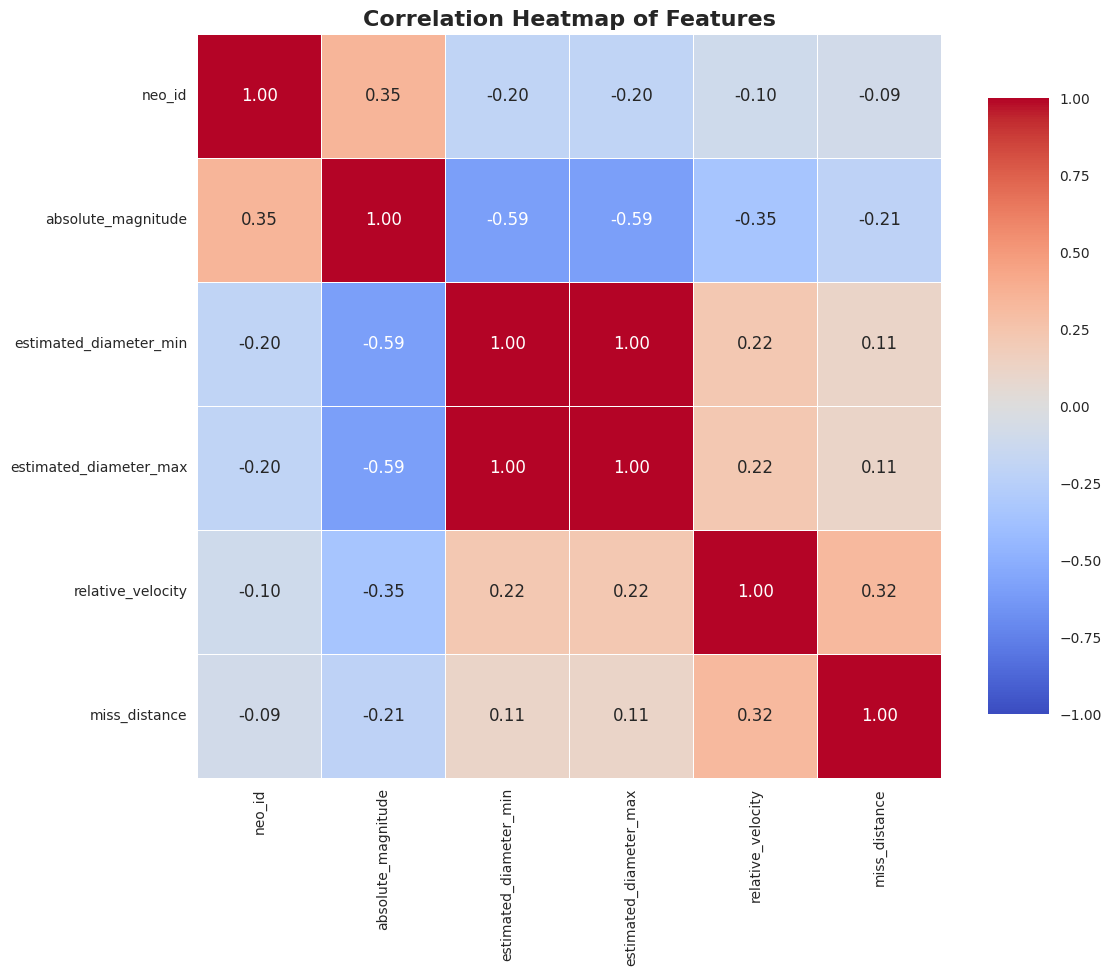

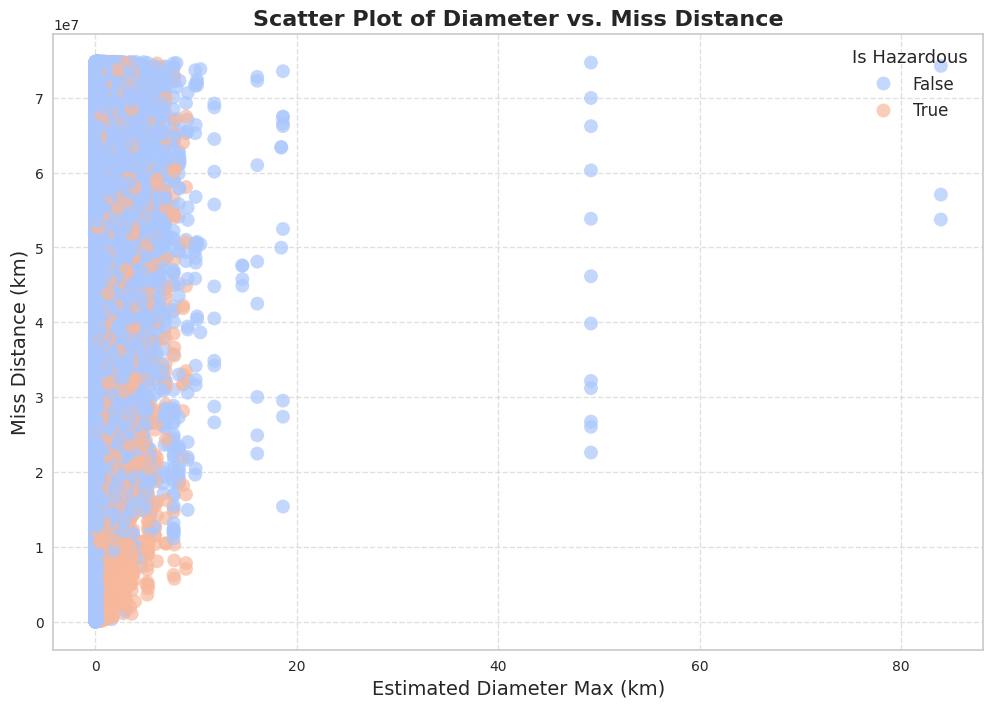

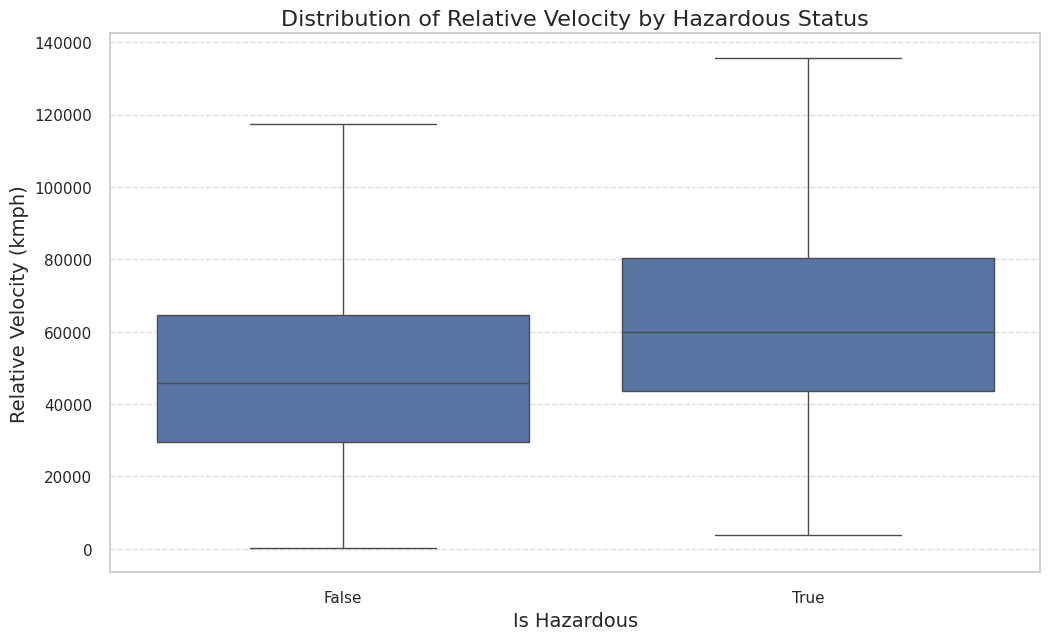

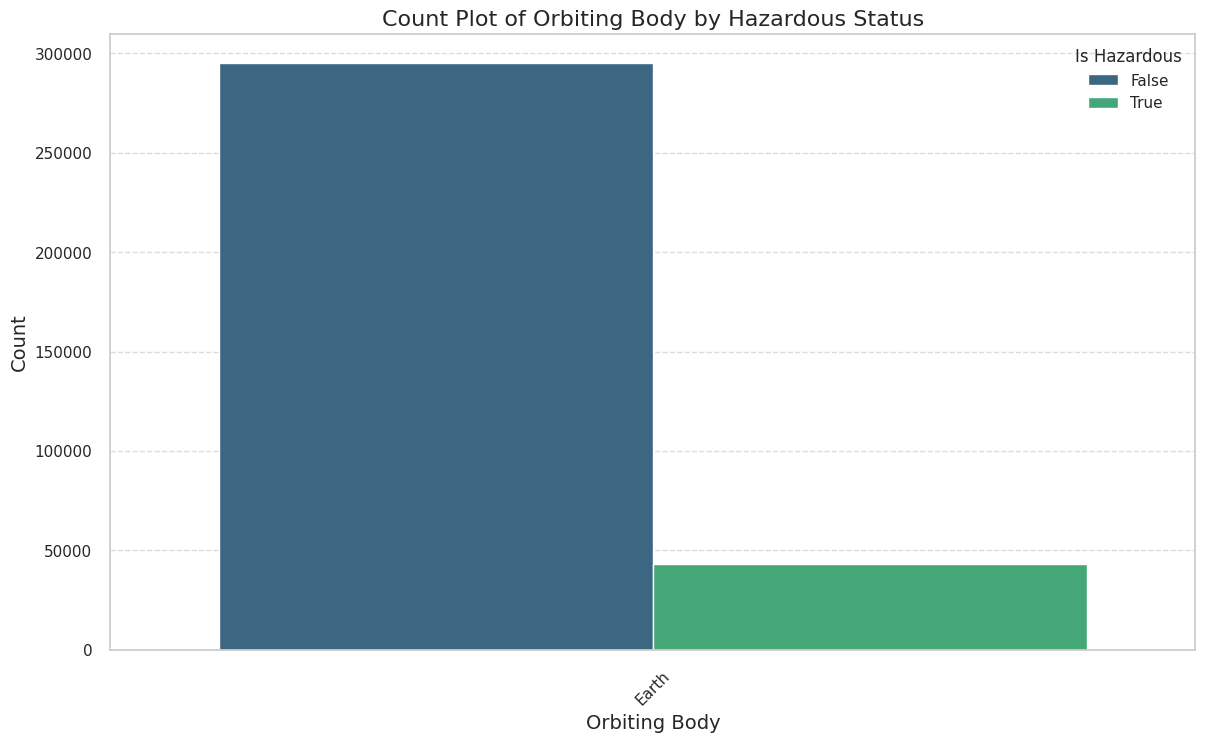

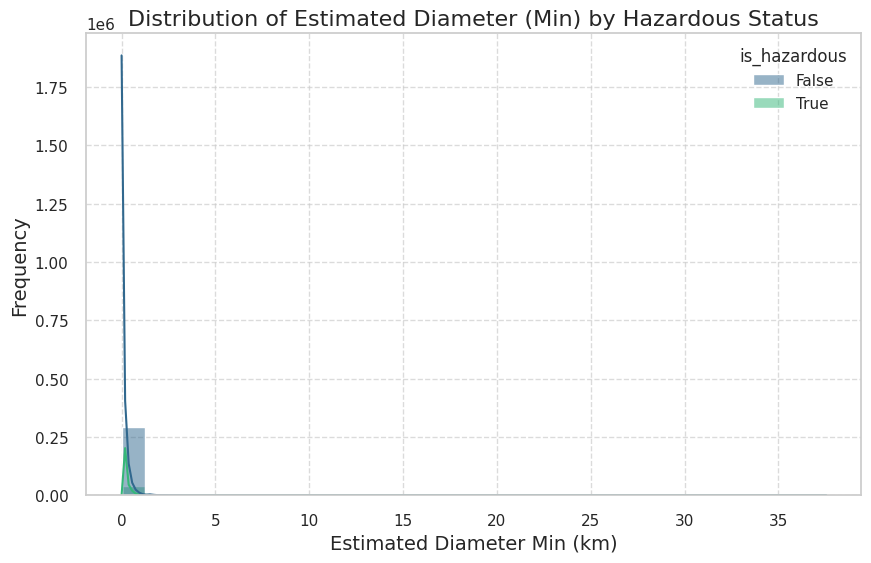

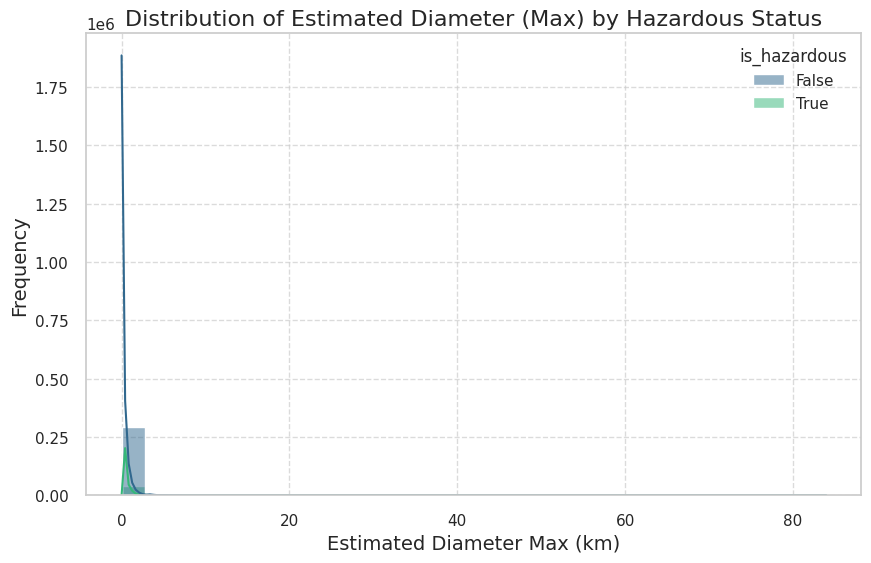

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
df=pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')

#Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Display basic statistics for numerical features
print("\nBasic statistics for numerical features:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# Print column names to verify them
print("\nColumn names in the dataset:")
print(df.columns.tolist())

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])


# 1. Distribution of Absolute Magnitude by Hazardous Status

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='absolute_magnitude', hue='is_hazardous', kde=True, palette='coolwarm', binwidth=0.5, alpha=0.6, linewidth=0)
plt.title('Distribution of Absolute Magnitude by Hazardous Status', fontsize=16, weight='bold')
plt.xlabel('Absolute Magnitude', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Is Hazardous', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Correlation Heatmap Including is_hazardous

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            vmin=-1, vmax=1,
            square=True,
            cbar_kws={'shrink': .8, 'aspect': 10})
plt.title('Correlation Heatmap of Features', fontsize=16, weight='bold')
plt.show()

# 3. Scatter Plot of Diameter vs Miss Distance

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,
                x='estimated_diameter_max',
                y='miss_distance',
                hue='is_hazardous',
                palette='coolwarm',
                alpha=0.7,
                s=100,
                edgecolor=None,
                linewidth=0)
plt.title('Scatter Plot of Diameter vs. Miss Distance', fontsize=16, weight='bold')
plt.xlabel('Estimated Diameter Max (km)', fontsize=14)
plt.ylabel('Miss Distance (km)', fontsize=14)
plt.legend(title='Is Hazardous', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Boxplot of Relative Velocity by Hazardous Status

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
boxplot = sns.boxplot(data=df, x='is_hazardous', y='relative_velocity', showfliers=False)
plt.title('Distribution of Relative Velocity by Hazardous Status', fontsize=16)
plt.xlabel('Is Hazardous', fontsize=14)
plt.ylabel('Relative Velocity (kmph)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Countplot of Orbiting Bodies

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
countplot = sns.countplot(x='orbiting_body', hue='is_hazardous', data=df, palette='viridis', order=df['orbiting_body'].value_counts().index)
plt.title('Count Plot of Orbiting Body by Hazardous Status', fontsize=16)
plt.xlabel('Orbiting Body', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Is Hazardous')
plt.show()

# 6. Distribution of Estimated Diameter (Min) by Hazardous Status

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=df, x='estimated_diameter_min', hue='is_hazardous', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Estimated Diameter (Min) by Hazardous Status', fontsize=16)
plt.xlabel('Estimated Diameter Min (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. Distribution of Estimated Diameter (Max) by Hazardous Status

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=df, x='estimated_diameter_max', hue='is_hazardous', bins=30, kde=True, palette='viridis')
plt.title('Distribution of Estimated Diameter (Max) by Hazardous Status', fontsize=16)
plt.xlabel('Estimated Diameter Max (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

,Description,Value
0,Session id,42
1,Target,is_hazardous
2,Target type,Binary
3,Original data shape,"(338199, 6)"
4,Transformed data shape,"(338199, 6)"
5,Transformed train set shape,"(236739, 6)"
6,Transformed test set shape,"(101460, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9134,0.9445,0.5316,0.7172,0.6105,0.5631,0.5711,15.2290
rf,Random Forest Classifier,0.9123,0.9434,0.5303,0.7096,0.6070,0.5588,0.5663,42.5580
xgboost,Extreme Gradient Boosting,0.8924,0.9137,0.2672,0.7076,0.3878,0.3417,0.3910,1.8570
lightgbm,Light Gradient Boosting Machine,0.8877,0.9042,0.2010,0.7128,0.3134,0.2726,0.3387,6.3560
gbc,Gradient Boosting Classifier,0.8853,0.8952,0.1583,0.7361,0.2604,0.2255,0.3062,40.3500
ada,Ada Boost Classifier,0.8835,0.8859,0.1581,0.6921,0.2571,0.2201,0.2929,8.9560
dt,Decision Tree Classifier,0.8824,0.7386,0.5456,0.5390,0.5422,0.4748,0.4748,1.3690
knn,K Neighbors Classifier,0.8779,0.8478,0.3809,0.5301,0.4433,0.3768,0.3833,2.1130
svm,SVM - Linear Kernel,0.8724,0.8115,0.0000,0.0000,0.0000,0.0000,0.0000,0.3460
qda,Quadratic Discriminant Analysis,0.8724,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2910


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best PyCaret Model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


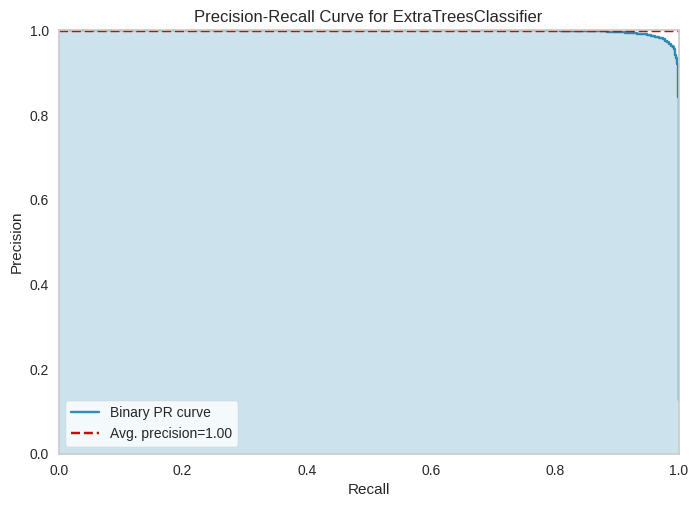

Best Scikit-learn Model: Random Forest
PR-AUC Score: 0.73

Model: Logistic Regression
PR-AUC Score: 0.35
Classification Report:
              precision    recall  f1-score       support
False          0.879560  0.988307  0.930768  59011.000000
True           0.482371  0.074516  0.129091   8629.000000
accuracy       0.871733  0.871733  0.871733      0.871733
macro avg      0.680965  0.531412  0.529929  67640.000000
weighted avg   0.828890  0.871733  0.828496  67640.000000
Confusion Matrix:
[[58321   690]
 [ 7986   643]]

Model: Decision Tree
PR-AUC Score: 0.60
Classification Report:
              precision    recall  f1-score       support
False          0.938451  0.935080  0.936763  59011.000000
True           0.566678  0.580600  0.573555   8629.000000
accuracy       0.889858  0.889858  0.889858      0.889858
macro avg      0.752565  0.757840  0.755159  67640.000000
weighted avg   0.891023  0.889858  0.890427  67640.000000
Confusion Matrix:
[[55180  3831]
 [ 3619  5010]]

Model: Random

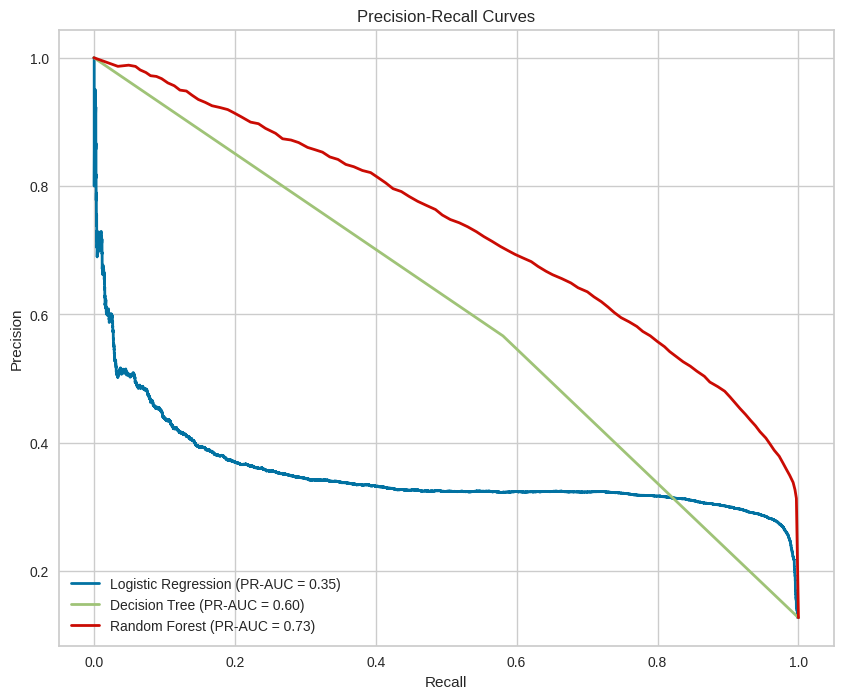

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from pycaret.classification import *

# Load the dataset
df = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')

# Handle missing values separately for numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Impute missing values for numeric columns with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Impute missing values for categorical columns with the most frequent value
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Convert categorical features to numeric
df['orbiting_body'] = df['orbiting_body'].astype('category').cat.codes

# Feature Engineering: Calculate average diameter
df['estimated_diameter_avg'] = (df['estimated_diameter_min'] + df['estimated_diameter_max']) / 2

# Select features and target variable
features = ['absolute_magnitude', 'estimated_diameter_avg', 'relative_velocity', 'miss_distance', 'orbiting_body']
X = df[features]
y = df['is_hazardous']

# Combine features and target into a single DataFrame for PyCaret
data = X.copy()
data['is_hazardous'] = y

# Initialize the PyCaret environment
clf = setup(data, target='is_hazardous', session_id=42,
            normalize=True,  # Normalize features
            remove_multicollinearity=True,  # Remove multicollinearity
            ignore_features=None)  # Do not ignore any features

# Compare models using PyCaret
best_model_pycaret = compare_models()

# Print the best model in PyCaret
print(f"Best PyCaret Model: {best_model_pycaret}")

# Evaluate the best PyCaret model
evaluate_model(best_model_pycaret)

# Finalize and save the PyCaret model
final_model_pycaret = finalize_model(best_model_pycaret)
save_model(final_model_pycaret, 'best_neo_model_pycaret')

# Plot Precision-Recall curve for the best PyCaret model
plot_model(final_model_pycaret, plot='pr')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    confusion = confusion_matrix(y_test, y_pred)

    return report, pr_auc, confusion

# Evaluate all scikit-learn models
results = {}
for model_name, model in models.items():
    report, pr_auc, confusion = evaluate_model_sklearn(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {'report': report, 'pr_auc': pr_auc, 'confusion': confusion}

# Print the results for scikit-learn models
best_model_name = max(results, key=lambda x: results[x]['pr_auc'])
print(f"Best Scikit-learn Model: {best_model_name}")
print(f"PR-AUC Score: {results[best_model_name]['pr_auc']:.2f}")

# Display all model results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"PR-AUC Score: {metrics['pr_auc']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['report']).transpose())
    print("Confusion Matrix:")
    print(metrics['confusion'])

# Plot Precision-Recall curves for all scikit-learn models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, lw=2, label=f'{model_name} (PR-AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()


In [ ]:
# 1. Unique aspects of the data:

# The dataset featured a significant imbalance between hazardous and non-hazardous Near-Earth Objects (NEOs).
# Such imbalances can skew model performance, as classifiers may become biased toward the majority class.

# 2. Data cleaning and Imputation:

# The dataset contained both numeric and categorical columns with missing values.
# Missing values in numeric columns were imputed with the median of each column, Missing values in categorical
# columns were imputed with the most frequent value (mode) of each column.
# A new feature, estimated_diameter_avg, was created by averaging the estimated_diameter_min
# and estimated_diameter_max columns
# The categorical column orbiting_body was converted into numeric codes.

# 3. Evaluation Process

# PyCaret: The ExtraTreesClassifier was identified as the best model based on PyCaret's comparison, which was further
# validated using precision-recall curves.

# Scikit-Learn Models: Among the scikit-learn models, Random Forest provided the highest PR-AUC score, indicating its
# superior performance in balancing precision and recall.

# 4. Problems and Solutions:

# Handling Imbalanced Data:
# Used Precision-Recall AUC for evaluation, which is better suited for imbalanced datasets.

# Missing Values:
# Imputed missing values with median for numeric and mode for categorical columns to preserve data integrity.

# 5. Future Work:

# Class Imbalance:
# By using techniques like oversampling or undersampling to address class imbalance directly in the training process.

# Outlier Detection and Handling:
# Implementing specific methods for detecting and treating outliers to improve model robustness.

# Longitudinal Analysis:
# Analyze trends or changes in NEO characteristics over time to provide deeper insights into their behavior
# and hazard potential.

# Integration of External Data:
# Integrating other datasets or additional features related to NEOs, to enhance the model and improve predictions.